In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read the CSV files into a DataFrame
code_dir = os.getcwd()
data_path = os.path.join(code_dir, '../output_data/data_for_model.csv')
df = pd.read_csv(data_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636 entries, 0 to 9635
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Province                             9636 non-null   object 
 1   Type of Property                     9636 non-null   object 
 2   Subtype of Property                  9636 non-null   object 
 3   Price                                9636 non-null   float64
 4   Number of Rooms                      9636 non-null   float64
 5   Livable Space (m2)                   9636 non-null   int64  
 6   PEB                                  9636 non-null   object 
 7   Primary Energy Consumption (kWh/m2)  9636 non-null   float64
 8   State of the Building                9636 non-null   object 
 9   Subtype of Property_Grouped          9636 non-null   object 
 10  Population                           9636 non-null   int64  
 11  Avg_Taxable_Income            

Price                                  1.000000
Livable Space (m2)                     0.761526
Number of Rooms                        0.535714
Avg_Taxable_Income                     0.306523
Number_of_Transactions                 0.014858
Add_Fearures                           0.014234
Primary Energy Consumption (kWh/m2)   -0.019849
Population                            -0.059316
Number_of_Buildings                   -0.060802
Name: Price, dtype: float64


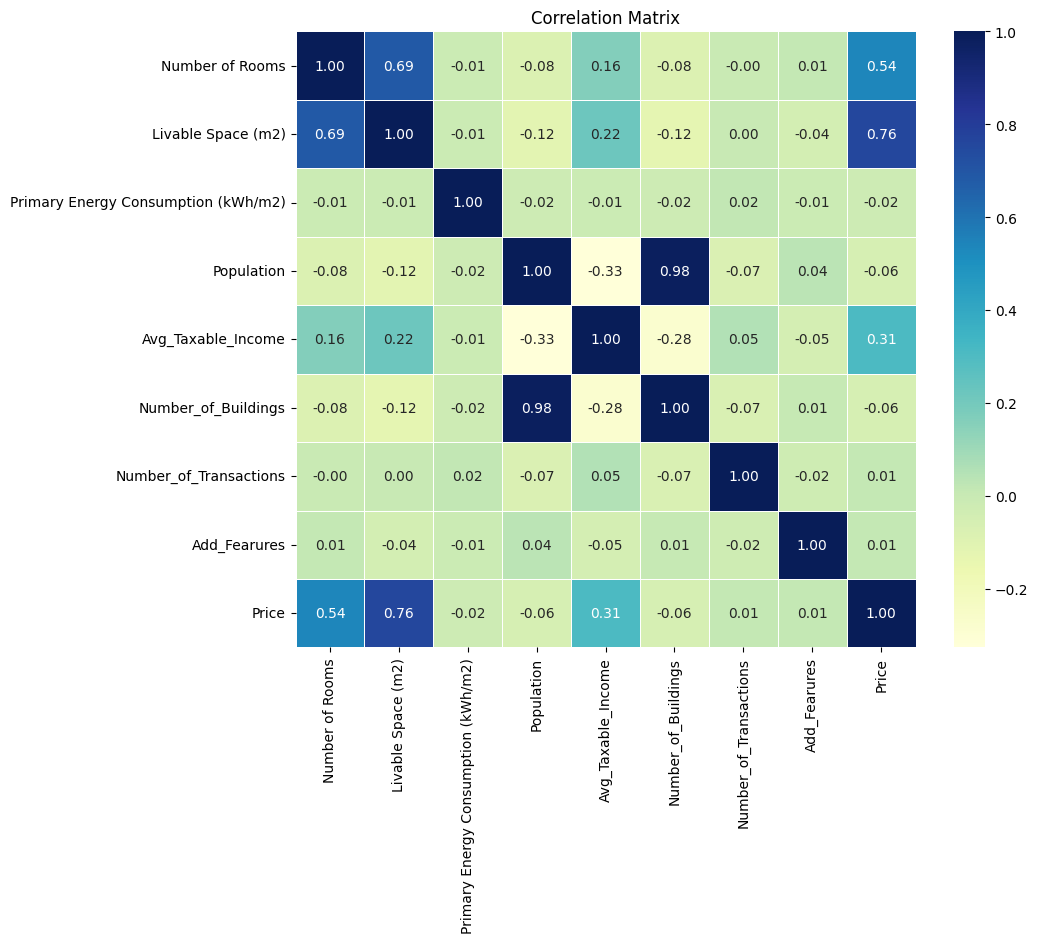

In [4]:
selected_columns = [
       'Number of Rooms', 'Livable Space (m2)',
       'Primary Energy Consumption (kWh/m2)',
       'Population', 'Avg_Taxable_Income',
       'Number_of_Buildings', 'Number_of_Transactions', 'Add_Fearures'  
    ]  
# Calculate the correlation matrix for the selected columns and 'Price'
correlations = df[selected_columns + ['Price']].corr()
correlation_with_price = correlations['Price'].sort_values(ascending=False)
print(correlation_with_price)

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size
sns.heatmap(correlations, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix')
plt.show()

In [5]:
df['Price per m2'] = round(df['Price'] / df['Livable Space (m2)'], 0)

Price per m2                           1.000000
Avg_Taxable_Income                     0.124839
Number_of_Buildings                    0.092666
Add_Fearures                           0.087038
Population                             0.083491
Number_of_Transactions                 0.028619
Primary Energy Consumption (kWh/m2)   -0.031602
Number of Rooms                       -0.216673
Livable Space (m2)                    -0.232441
Name: Price per m2, dtype: float64


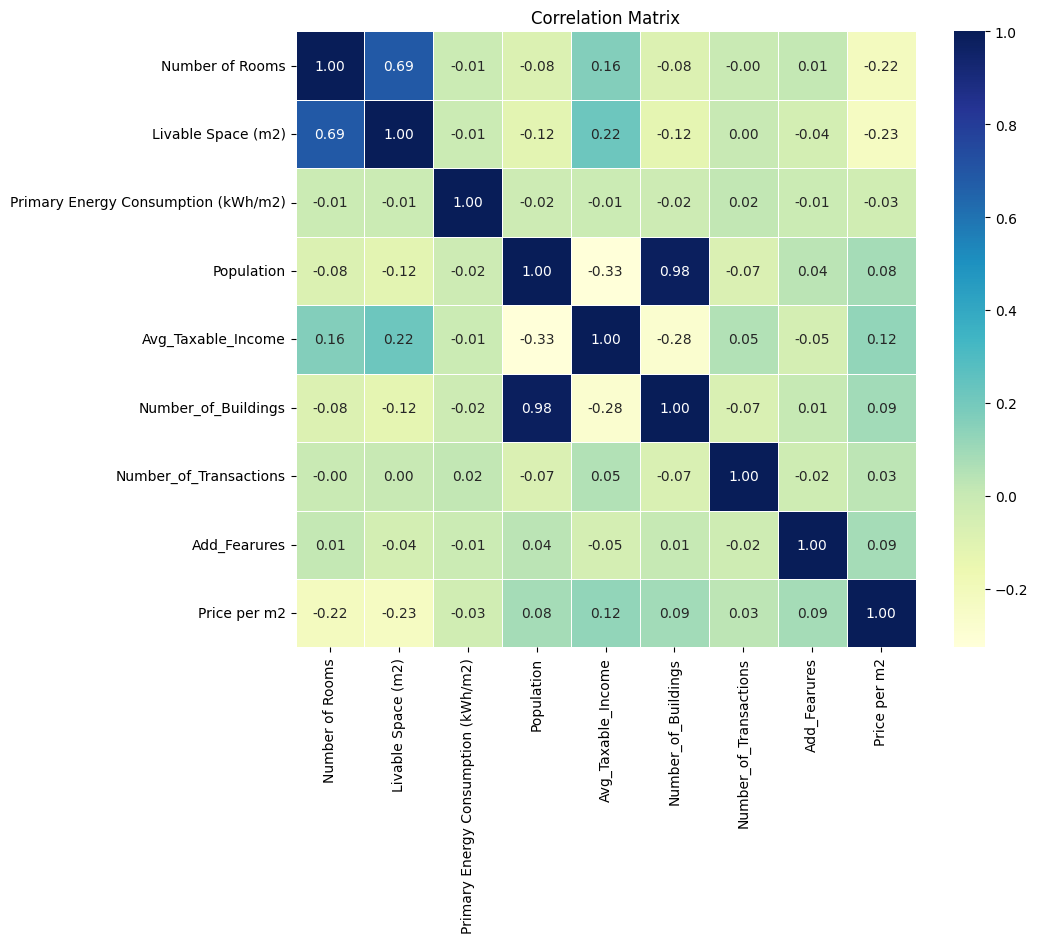

In [6]:
selected_columns = [
       'Number of Rooms', 'Livable Space (m2)',
       'Primary Energy Consumption (kWh/m2)',
       'Population', 'Avg_Taxable_Income',
       'Number_of_Buildings', 'Number_of_Transactions', 'Add_Fearures'  
    ]  
# Calculate the correlation matrix for the selected columns and 'Price'
correlations = df[selected_columns + ['Price per m2']].corr()
correlation_with_price = correlations['Price per m2'].sort_values(ascending=False)
print(correlation_with_price)

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size
sns.heatmap(correlations, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Calculate mean encoding for 'State of the Building'
encoded_feature = df.groupby('State of the Building')['Price'].mean()

# Map the mean encoding back to the original dataframe
df['Encoded_State'] = df['State of the Building'].map(encoded_feature)

# Calculate correlation
correlation = df['Encoded_State'].corr(df['Price'])
print("Correlation with Price:", correlation)

correlation = df['Encoded_State'].corr(df['Price per m2'])
print("Correlation with Price per m2:", correlation)

Correlation with Price: 0.2833462387610628
Correlation with Price per m2: 0.20210372501383098


In [8]:
# Calculate mean encoding for 'Subtype of Property_Grouped'
encoded_subtype = df.groupby('Subtype of Property_Grouped')['Price'].mean()

# Map the mean encoding back to the original dataframe
df['Encoded_Subtype'] = df['Subtype of Property_Grouped'].map(encoded_subtype)

# Calculate correlation
correlation = df['Encoded_Subtype'].corr(df['Price'])
print("Correlation with Price:", correlation)
correlation = df['Encoded_Subtype'].corr(df['Price per m2'])
print("Correlation with Price per m2:", correlation)

Correlation with Price: 0.4994219902544541
Correlation with Price per m2: -0.1763278366631107


In [9]:
# Calculate mean encoding for 'PEB'
encoded_peb = df.groupby('PEB')['Price'].mean()

# Map the mean encoding back to the original dataframe
df['Encoded_PEB'] = df['PEB'].map(encoded_peb)

# Calculate correlation
correlation = df['Encoded_PEB'].corr(df['Price'])
print("Correlation with Price:", correlation)
correlation = df['Encoded_PEB'].corr(df['Price per m2'])
print("Correlation with Price per m2:", correlation)

Correlation with Price: 0.13104363078433362
Correlation with Price per m2: 0.17091948038206092


In [10]:
# Calculate mean encoding for 'Province'
encoded_province = df.groupby('Province')['Price'].mean()

# Map the mean encoding back to the original dataframe
df['Encoded_Province'] = df['Province'].map(encoded_province)

# Calculate correlation
correlation = df['Encoded_Province'].corr(df['Price'])
print("Correlation with Price:", correlation)
correlation = df['Encoded_Province'].corr(df['Price per m2'])
print("Correlation with Price per m2:", correlation)

Correlation with Price: 0.2847003936560675
Correlation with Price per m2: 0.2737176227665833


In [11]:
# Calculate mean encoding for 'Type of Property'
encoded_type = df.groupby('Type of Property')['Price'].mean()

# Map the mean encoding back to the original dataframe
df['Encoded_Type'] = df['Type of Property'].map(encoded_type)

# Calculate correlation
correlation = df['Encoded_Type'].corr(df['Price'])
print("Correlation with Price:", correlation)
correlation = df['Encoded_Type'].corr(df['Price per m2'])
print("Correlation with Price per m2:", correlation)

Correlation with Price: 0.337964037294847
Correlation with Price per m2: -0.3741935319957207


In [12]:
# Calculate mean encoding for 'Subtype of Property'
encoded_subtype_2 = df.groupby('Subtype of Property')['Price'].mean()

# Map the mean encoding back to the original dataframe
df['Encoded_Subtype_2'] = df['Subtype of Property'].map(encoded_subtype_2)

# Calculate correlation
correlation = df['Encoded_Subtype_2'].corr(df['Price'])
print("Correlation with Price:", correlation)
correlation = df['Encoded_Subtype_2'].corr(df['Price per m2'])
print("Correlation with Price per m2:", correlation)

Correlation with Price: 0.5326873864501537
Correlation with Price per m2: -0.16394665552237137


In [13]:
df.columns

Index(['Province', 'Type of Property', 'Subtype of Property', 'Price',
       'Number of Rooms', 'Livable Space (m2)', 'PEB',
       'Primary Energy Consumption (kWh/m2)', 'State of the Building',
       'Subtype of Property_Grouped', 'Population', 'Avg_Taxable_Income',
       'Number_of_Buildings', 'Number_of_Transactions', 'Add_Fearures',
       'Price per m2', 'Encoded_State', 'Encoded_Subtype', 'Encoded_PEB',
       'Encoded_Province', 'Encoded_Type', 'Encoded_Subtype_2'],
      dtype='object')

Price                                  1.000000
Livable Space (m2)                     0.761526
Number of Rooms                        0.535714
Encoded_Subtype_2                      0.532687
Encoded_Subtype                        0.499422
Encoded_Type                           0.337964
Price per m2                           0.320215
Avg_Taxable_Income                     0.306523
Encoded_Province                       0.284700
Encoded_State                          0.283346
Encoded_PEB                            0.131044
Number_of_Transactions                 0.014858
Add_Fearures                           0.014234
Primary Energy Consumption (kWh/m2)   -0.019849
Population                            -0.059316
Number_of_Buildings                   -0.060802
Name: Price, dtype: float64


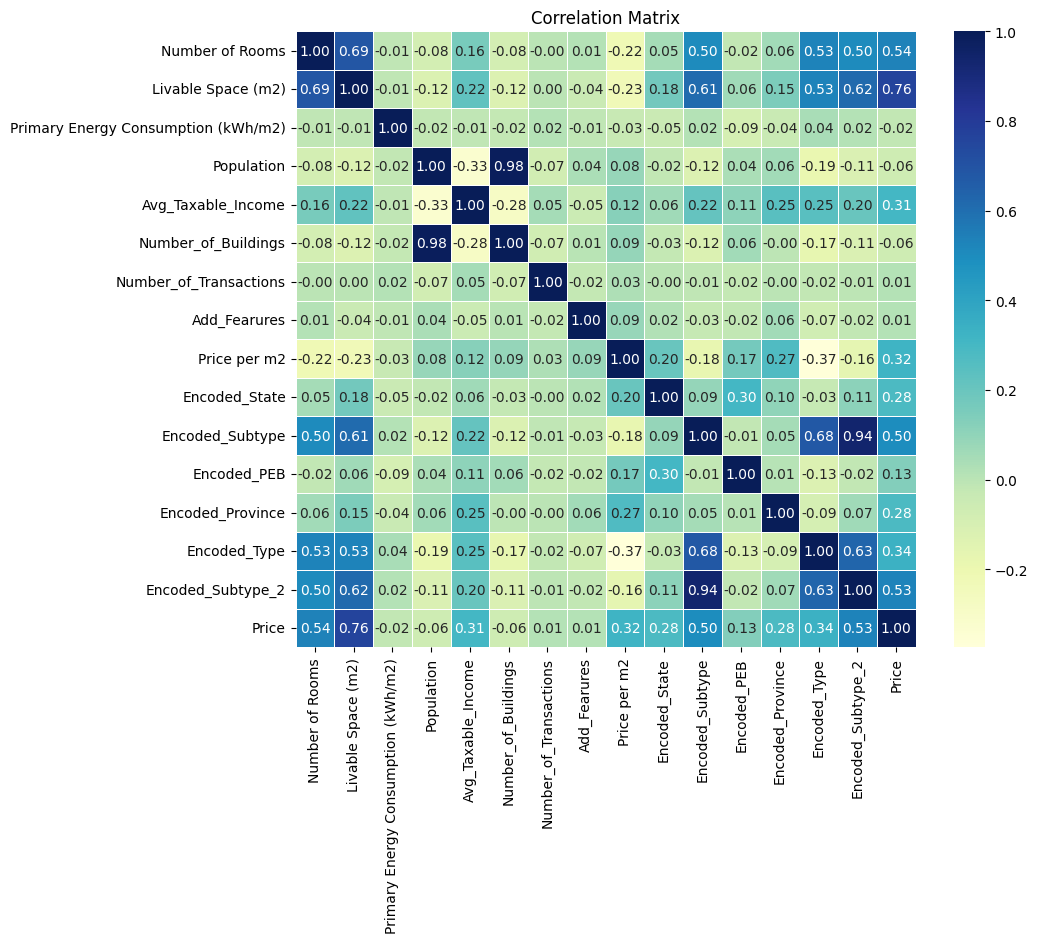

In [14]:
selected_columns = [
       'Number of Rooms', 'Livable Space (m2)',
       'Primary Energy Consumption (kWh/m2)',
       'Population', 'Avg_Taxable_Income',
       'Number_of_Buildings', 'Number_of_Transactions', 'Add_Fearures',
       'Price per m2', 'Encoded_State', 'Encoded_Subtype', 'Encoded_PEB',
        'Encoded_Province', 'Encoded_Type',
       'Encoded_Subtype_2'  
    ]  
# Calculate the correlation matrix for the selected columns and 'Price'
correlations = df[selected_columns + ['Price']].corr()
correlation_with_price = correlations['Price'].sort_values(ascending=False)
print(correlation_with_price)

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size
sns.heatmap(correlations, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix')
plt.show()

Price per m2                           1.000000
Price                                  0.320215
Encoded_Province                       0.273718
Encoded_State                          0.202104
Encoded_PEB                            0.170919
Avg_Taxable_Income                     0.124839
Number_of_Buildings                    0.092666
Add_Fearures                           0.087038
Population                             0.083491
Number_of_Transactions                 0.028619
Primary Energy Consumption (kWh/m2)   -0.031602
Encoded_Subtype_2                     -0.163947
Encoded_Subtype                       -0.176328
Number of Rooms                       -0.216673
Livable Space (m2)                    -0.232441
Encoded_Type                          -0.374194
Name: Price per m2, dtype: float64


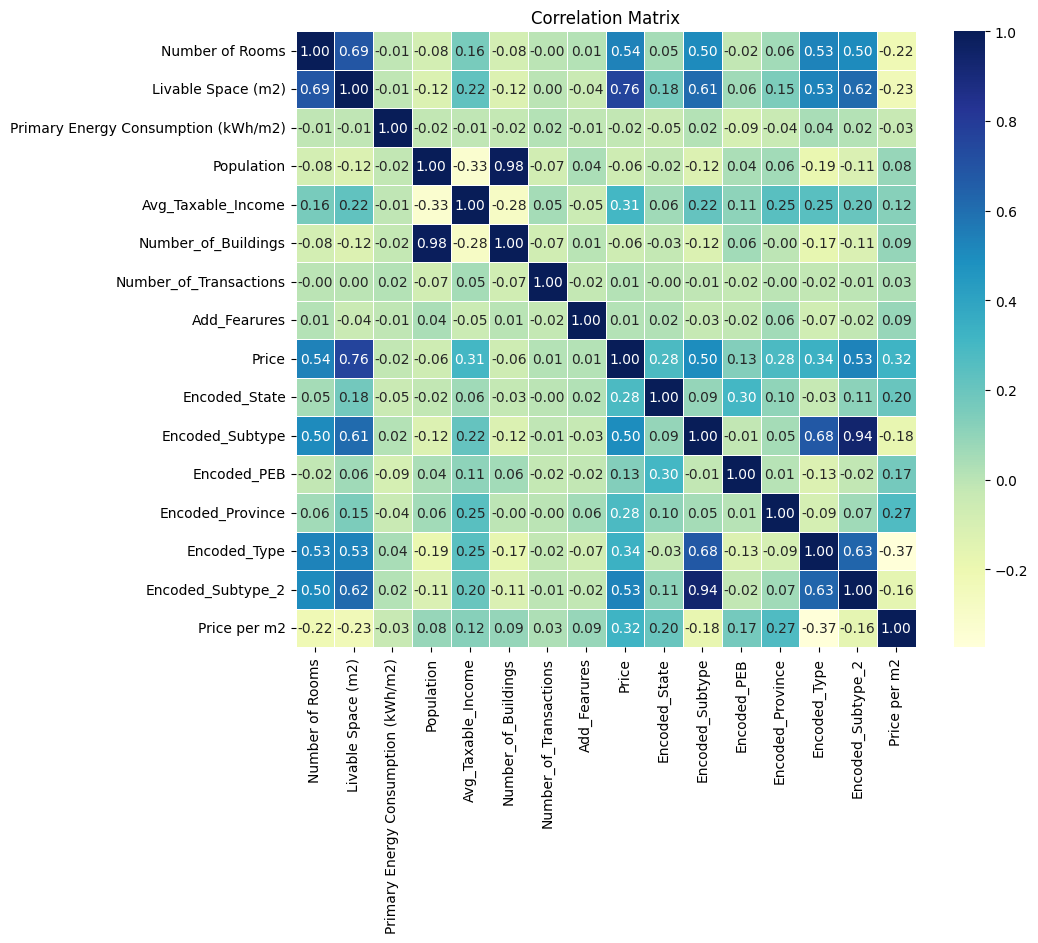

In [15]:
selected_columns = [
       'Number of Rooms', 'Livable Space (m2)',
       'Primary Energy Consumption (kWh/m2)',
       'Population', 'Avg_Taxable_Income',
       'Number_of_Buildings', 'Number_of_Transactions', 'Add_Fearures',
       'Price', 'Encoded_State', 'Encoded_Subtype', 'Encoded_PEB',
        'Encoded_Province', 'Encoded_Type',
       'Encoded_Subtype_2'  
    ]  
# Calculate the correlation matrix for the selected columns and 'Price'
correlations = df[selected_columns + ['Price per m2']].corr()
correlation_with_price = correlations['Price per m2'].sort_values(ascending=False)
print(correlation_with_price)

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size
sns.heatmap(correlations, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.shape

(9636, 22)

In [17]:
X = df[['Livable Space (m2)', 'Encoded_Subtype_2', 'Avg_Taxable_Income', 'Encoded_Province', 'Encoded_State']].values.reshape(-1, 5) # X as a 2D array (reshape)
y = df['Price'].values  # Target vector

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (9636, 5)
y shape: (9636,)


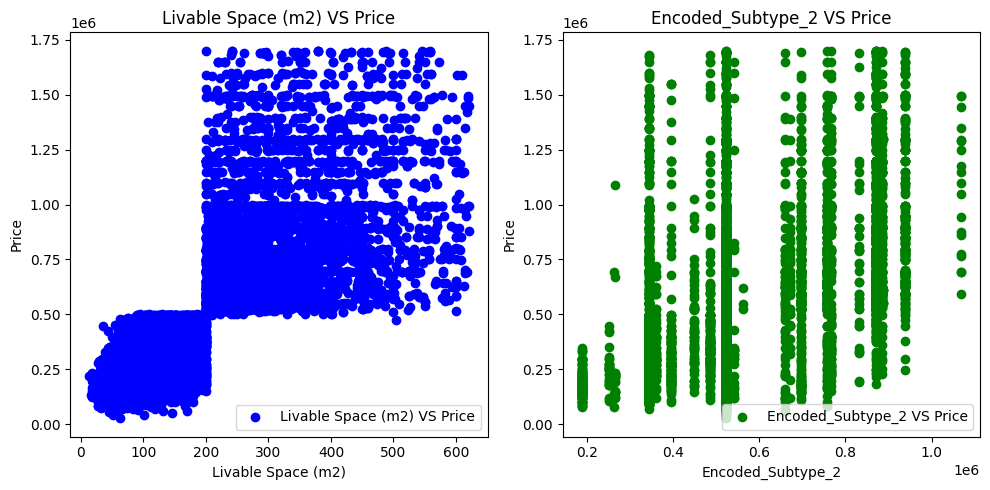

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Extract x1 and x2 from the 2D array
x1 = X[:, 0]  # First column
x2 = X[:, 1]  # Second column

# Scatter plot for x1 vs y
axes[0].scatter(x1, y, color='blue', label='Livable Space (m2) VS Price')
axes[0].set_xlabel("Livable Space (m2)")
axes[0].set_ylabel("Price")
axes[0].set_title("Livable Space (m2) VS Price")
axes[0].legend()

# Scatter plot for x2 vs y
axes[1].scatter(x2, y, color='green', label='Encoded_Subtype_2 VS Price')
axes[1].set_xlabel("Encoded_Subtype_2")
axes[1].set_ylabel("Price")
axes[1].set_title("Encoded_Subtype_2 VS Price")
axes[1].legend()

# Adjust layout if cramped
plt.tight_layout()

# Show the plot
plt.show()

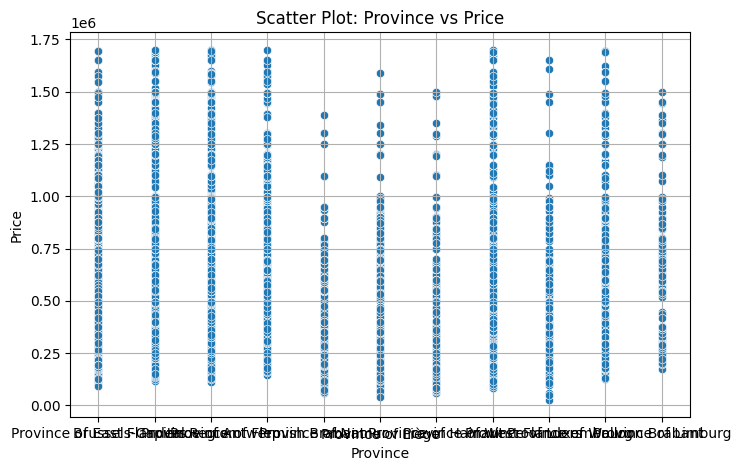

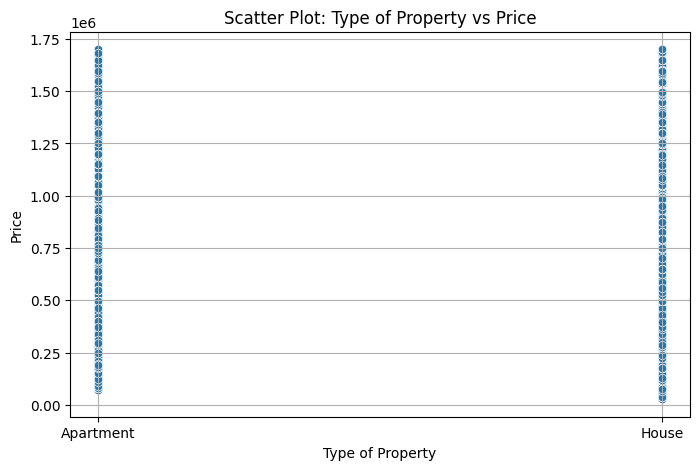

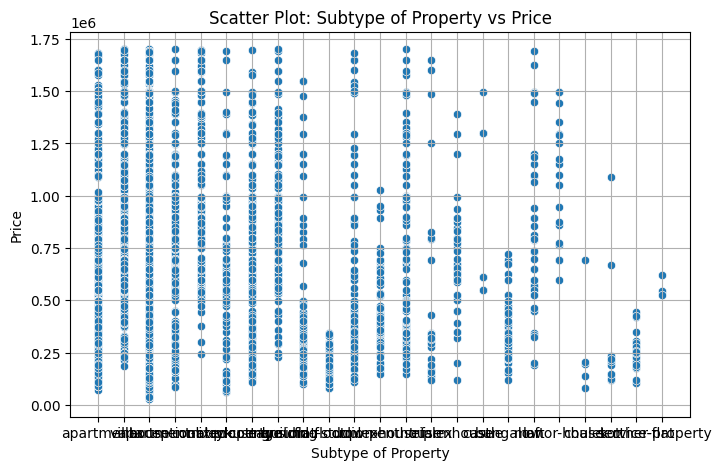

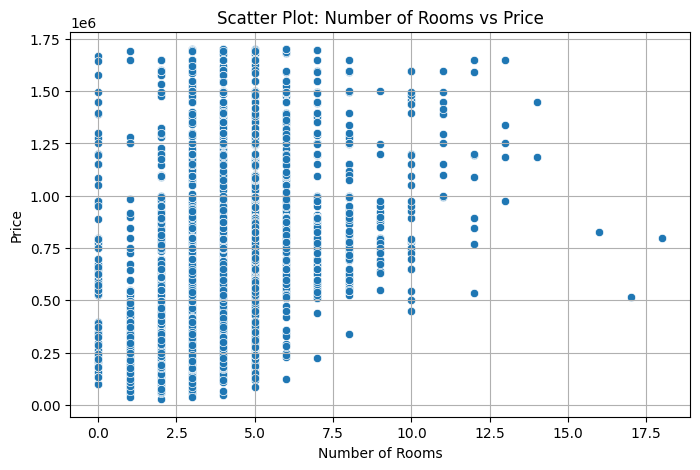

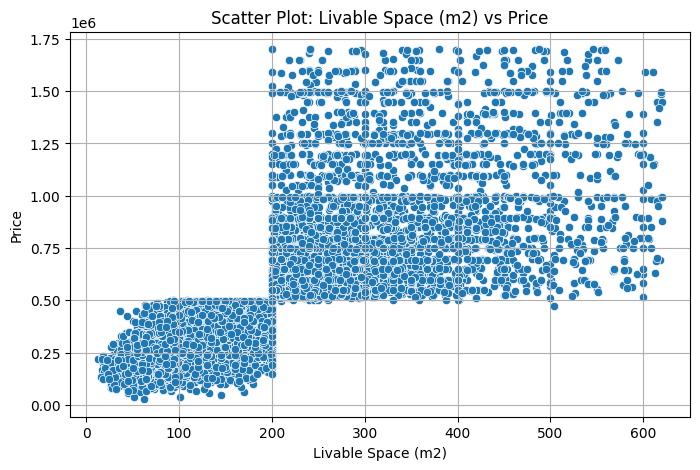

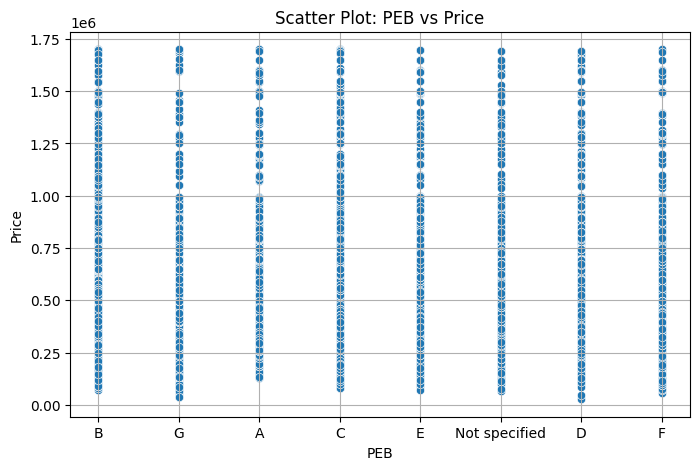

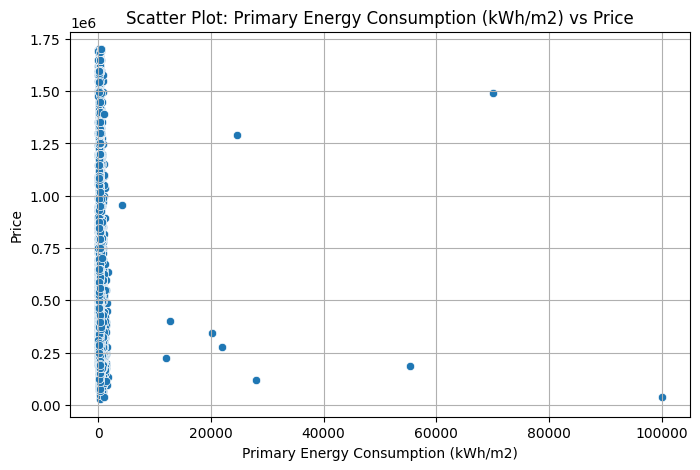

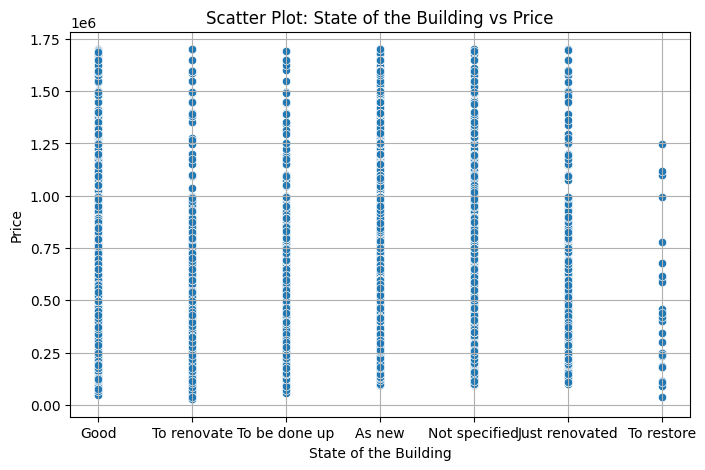

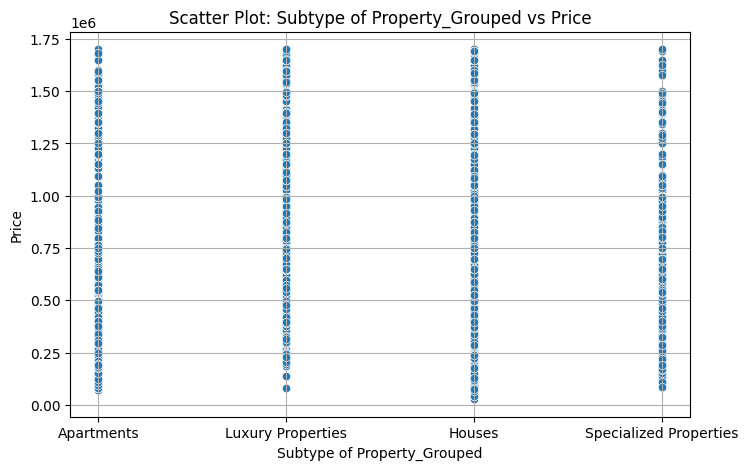

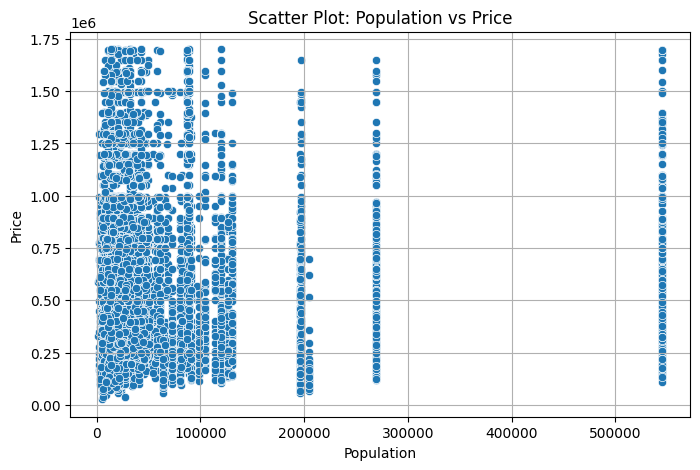

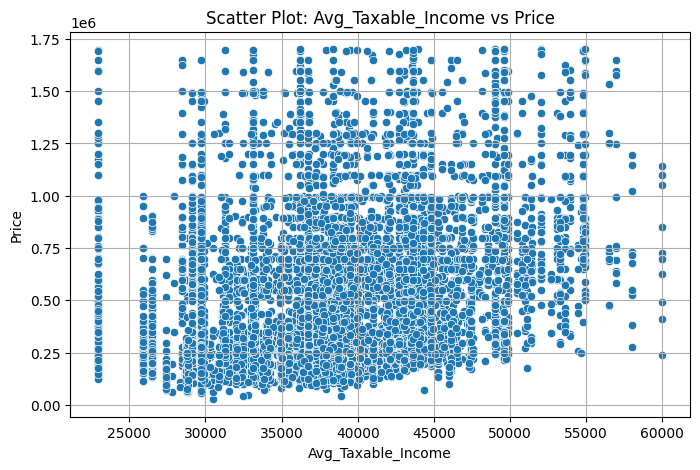

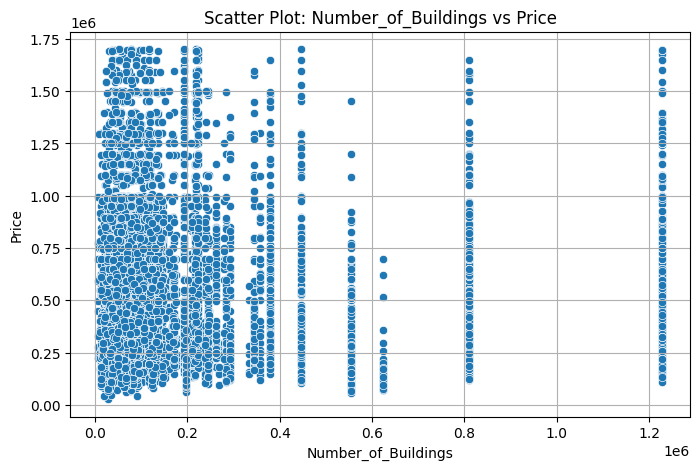

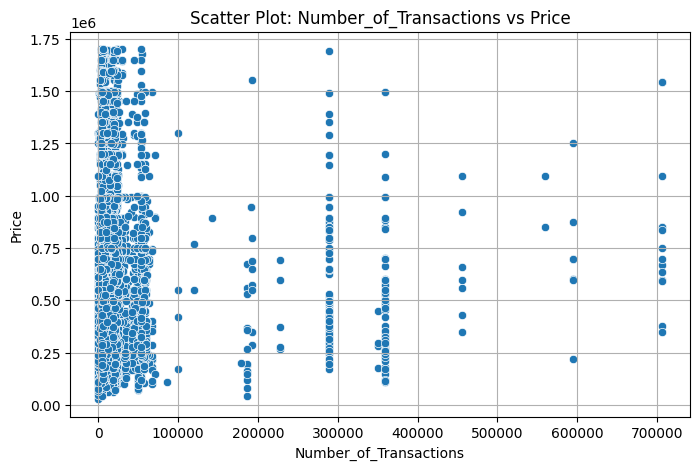

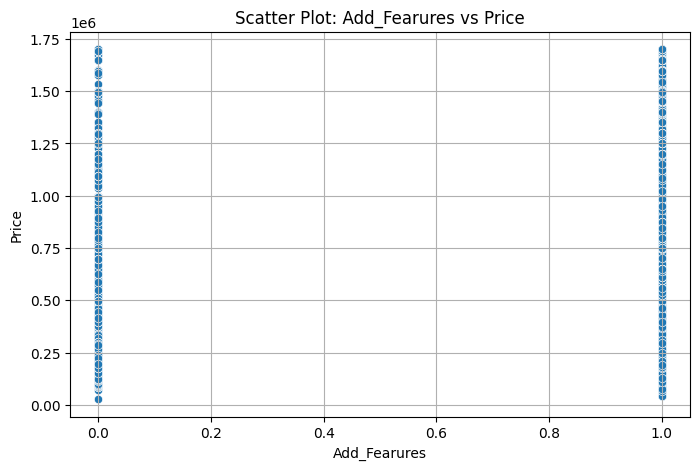

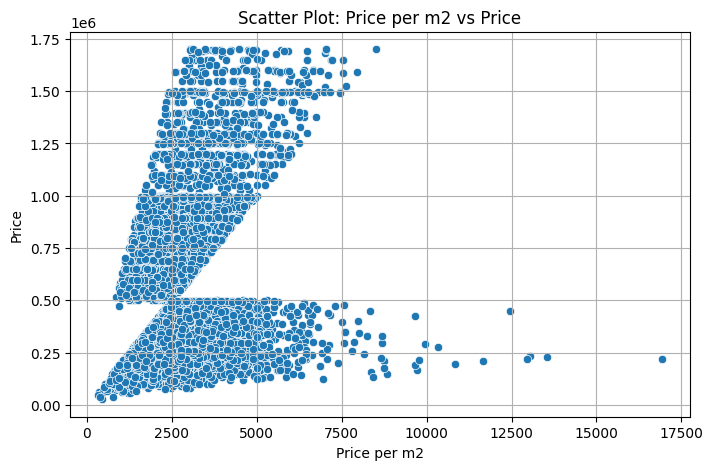

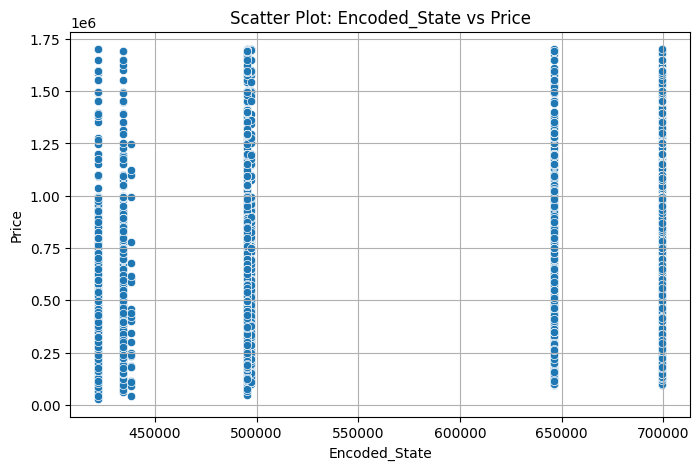

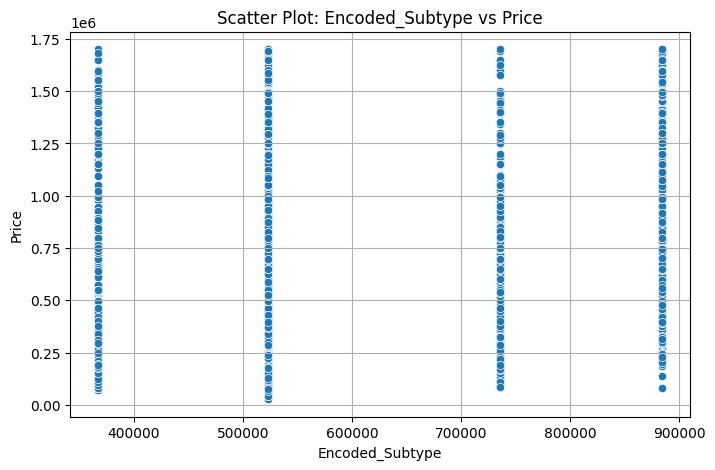

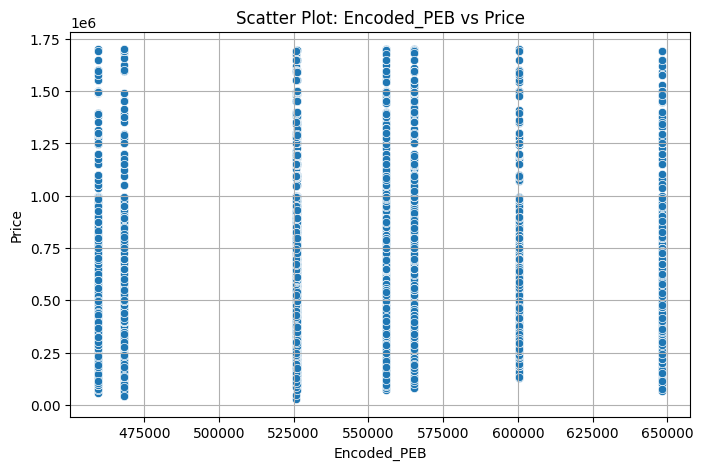

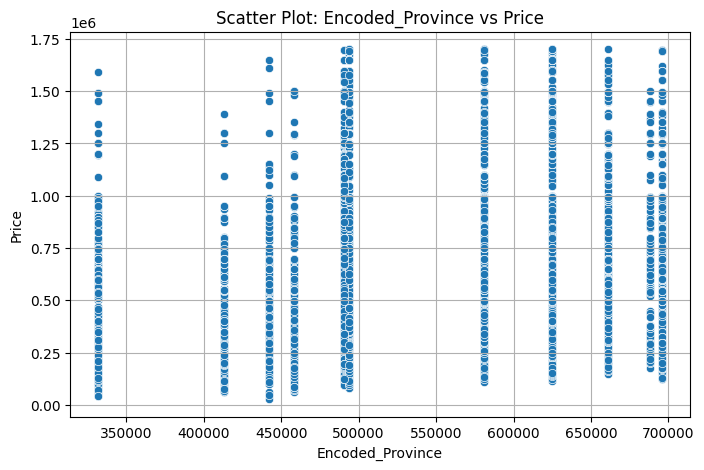

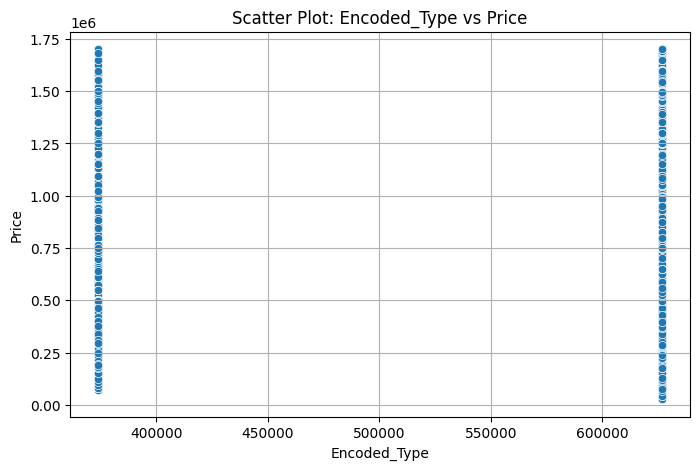

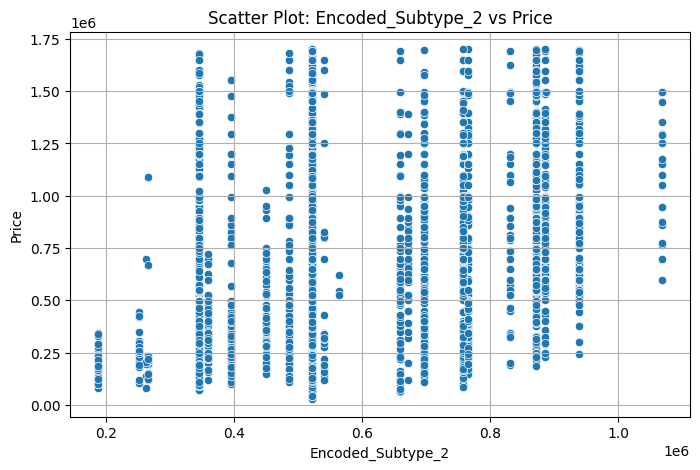

In [19]:
target_column = 'Price'
features = [col for col in df.columns if col != target_column]  # Exclude the target column

# Create a scatter plot for each feature against the target
for feature in features:
    plt.figure(figsize=(8, 5))  # Set the figure size
    sns.scatterplot(x=df[feature], y=df[target_column])
    plt.title(f'Scatter Plot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

In [ ]:
#df['Avg_Taxable_Income'] = df['Avg_Taxable_Income'].fillna(0)

In [19]:
# Calculate correlation for each feature in X with y
correlations = []
for i in range(X.shape[1]):  # Iterate through each column of X
    corr = np.corrcoef(X[:, i], y)[0, 1]  # Correlation between feature i and y
    correlations.append(corr)
    print(f"Correlation between x_{i+1} and y: {corr:.2f}")

# Convert to NumPy array if needed
correlations = np.array(correlations)

Correlation between x_1 and y: 0.76
Correlation between x_2 and y: 0.53
Correlation between x_3 and y: 0.31
Correlation between x_4 and y: 0.28
Correlation between x_5 and y: 0.28


In [20]:
print(df['Avg_Taxable_Income'].nunique())  # Unique values in x_3

535


In [21]:
print(df['Avg_Taxable_Income'].isnull().sum()) 
print(df['Avg_Taxable_Income'].isna().sum())   
print("Inf values:", (df['Avg_Taxable_Income'] == float('inf')).sum())
print("-Inf values:", (df['Avg_Taxable_Income'] == float('-inf')).sum())
print(df['Price'].isnull().sum())   

0
0
Inf values: 0
-Inf values: 0
0


In [22]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7708, 5)
X_test shape: (1928, 5)
y_train shape: (7708,)
y_test shape: (1928,)


In [23]:
# Instantiate the LinearRegression class
regressor = LinearRegression()

#3. Train the model using X_train and y_train
regressor.fit(X_train, y_train)

"""# Output the model's coefficients (slope and intercept)
print(f"Coefficient_1 (slope): {regressor.coef_[0]:.2f}")
print(f"Coefficient_2 (slope): {regressor.coef_[1]:.2f}")
print(f"Intercept: {regressor.intercept_:.2f}")"""

# Get slopes (coefficients) and intercept
slopes = regressor.coef_  # Coefficients for each feature
intercept = regressor.intercept_  # Intercept of the model

# Display
print(f"Slopes (coefficients): {slopes}")
print(f"Intercept: {intercept}")

Slopes (coefficients): [1.80616294e+03 1.78786654e-01 5.27079470e+00 5.09009107e-01
 5.07565262e-01]
Intercept: -679939.6417164787


In [24]:
#4. Display the model score on the training set
train_score = regressor.score(X_train, y_train)  # R^2 score
print(f"Training set score (R^2): {train_score:.2f}")

Training set score (R^2): 0.65


In [25]:
#5 Predict y using the test data (X_test)
y_pred = regressor.predict(X_test)
print(f"Predicted y:\n {y_pred}")
print(f"Actual y:\n {y_test}")

Predicted y:
 [198969.86116763 556854.40433281 301775.34439575 ... 942520.80274057
 908070.97936005 865163.55428635]
Actual y:
 [ 195000.  449000.  218000. ...  685000. 1250000.  725000.]


In [26]:
#6. R-squared score (coefficient of determination, variance score): 1 means perfect prediction
test_score = regressor.score(X_test, y_test)
print(f'R-squared score on test data: {test_score:.2f}')

R-squared score on test data: 0.64
